# HW2: Numpy cho Khoa học dữ liệu - Xây dựng mô hình

Sau bước xử lý dữ liệu, ta đến với bước cuối cùng là xây dựng mô hình để đánh giá, đưa ra dự đoán 

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Shape Train: (19053, 14)
Shape Test: (2129, 14)
Bắt đầu training...
Iteration 0: Loss 0.6931
Iteration 1000: Loss 0.5008
Iteration 2000: Loss 0.4954
Iteration 3000: Loss 0.4943
Iteration 4000: Loss 0.4940


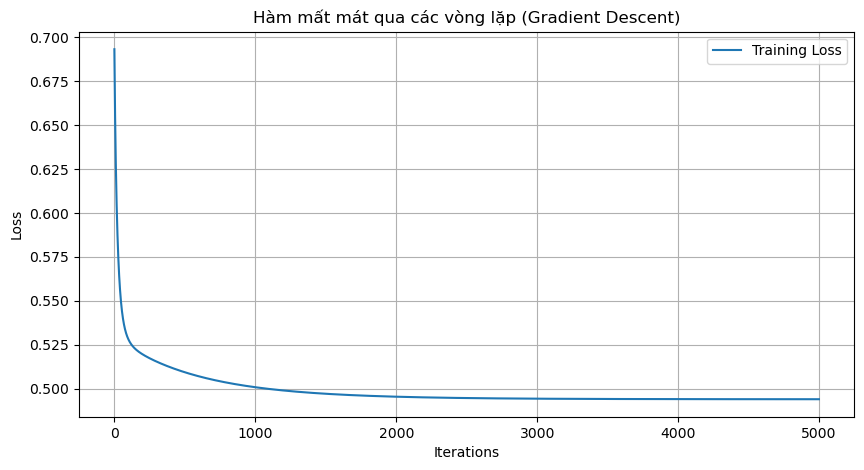

--- Đánh giá trên tập Validation ---
Accuracy:  0.7720
Precision: 0.5541
Recall:    0.2360
F1-Score:  0.3310
Đã tạo file submission tại: ../data/processed/sample_submission_final.csv


In [1]:
# %% [markdown]
# # 03. Modeling
# Mục tiêu: Train model Logistic Regression (NumPy) và đánh giá.

# %%
import sys
import os
import numpy as np

sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from models import LogisticRegressionNumPy, accuracy_score_numpy, confusion_matrix_metrics
from visualization import plot_loss_curve

# %%
# Load dữ liệu đã processed (Lưu ý: np.loadtxt vì file đã là số thuần túy)
train_path = os.path.join('..', 'data', 'processed', 'aug_train.csv')
test_path = os.path.join('..', 'data', 'processed', 'aug_test.csv')

# Load train: cột cuối cùng là target
train_data = np.loadtxt(train_path, delimiter=',')
X_full = train_data[:, :-1]
y_full = train_data[:, -1]

# Load test
X_test_submit = np.loadtxt(test_path, delimiter=',')

print(f"Shape Train: {X_full.shape}")
print(f"Shape Test: {X_test_submit.shape}")

# %%
# Chia Train/Validation (80/20) thủ công bằng NumPy
np.random.seed(42)
indices = np.arange(X_full.shape[0])
np.random.shuffle(indices)

split_idx = int(0.8 * len(indices))
train_idx, val_idx = indices[:split_idx], indices[split_idx:]

X_train, y_train = X_full[train_idx], y_full[train_idx]
X_val, y_val = X_full[val_idx], y_full[val_idx]

# %%
# Train Model
model = LogisticRegressionNumPy(learning_rate=0.1, num_iterations=5000)
print("Bắt đầu training...")
model.fit(X_train, y_train)

# Vẽ biểu đồ Loss
plot_loss_curve(model.losses)

# %%
# Đánh giá trên tập Validation
print("--- Đánh giá trên tập Validation ---")
y_pred_val = model.predict(X_val)

acc = accuracy_score_numpy(y_val, y_pred_val)
prec, rec, f1 = confusion_matrix_metrics(y_val, y_pred_val)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

# %%
# Dự đoán cho tập Test và tạo Submission
y_test_prob = model.predict_proba(X_test_submit)

# Để tạo file submission đúng format, ta cần enrollee_id từ file raw gốc
raw_test_path = os.path.join('..', 'data', 'raw', 'aug_test.csv')
# Đọc lại chỉ để lấy cột enrollee_id
# header dòng đầu, data các dòng sau
with open(raw_test_path, 'r') as f:
    header = f.readline()
    ids = [line.split(',')[0] for line in f] # Lấy cột đầu tiên

# Ghi file submission
sub_path = os.path.join('..', 'data', 'processed', 'sample_submission_final.csv')
with open(sub_path, 'w') as f:
    f.write("enrollee_id,target\n")
    for eid, prob in zip(ids, y_test_prob):
        f.write(f"{eid},{prob:.4f}\n")

print(f"Đã tạo file submission tại: {sub_path}")

Shape Train: (19053, 14)
Shape Test: (2129, 14)
Bắt đầu training...
Iteration 0: Loss 0.6931
Iteration 1000: Loss 0.5018
Iteration 2000: Loss 0.4968
Iteration 3000: Loss 0.4950
Iteration 4000: Loss 0.4943

--- Đánh giá trên tập Validation ---
Accuracy:  0.7717
Precision: 0.5565
Recall:    0.2217
F1-Score:  0.3171